In [1]:
import astropy.coordinates as coords
from astropy import units
from astropy import time

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
bberg = coords.EarthLocation(lat=39.332*units.deg, lon=-76.6232, height=100*units.m)
galcoord1 = coords.Galactic(l=80*units.deg, b=0*units.deg)
galcoord2 = coords.Galactic(l=30*units.deg, b=0*units.deg)

In [3]:
starttime = time.Time('2016-04-09 00:00:00') # EDT
utoffset = 4*units.hour
length = 24*units.hour
steps = 300
timesteps = np.linspace(0, length.to('hour'), steps)
times = starttime + timesteps
utc_times = times + utoffset # UTC

In [4]:
altazcoords1 = galcoord1.transform_to(coords.AltAz(location=bberg, obstime=utc_times))
altazcoords2 = galcoord2.transform_to(coords.AltAz(location=bberg, obstime=utc_times))

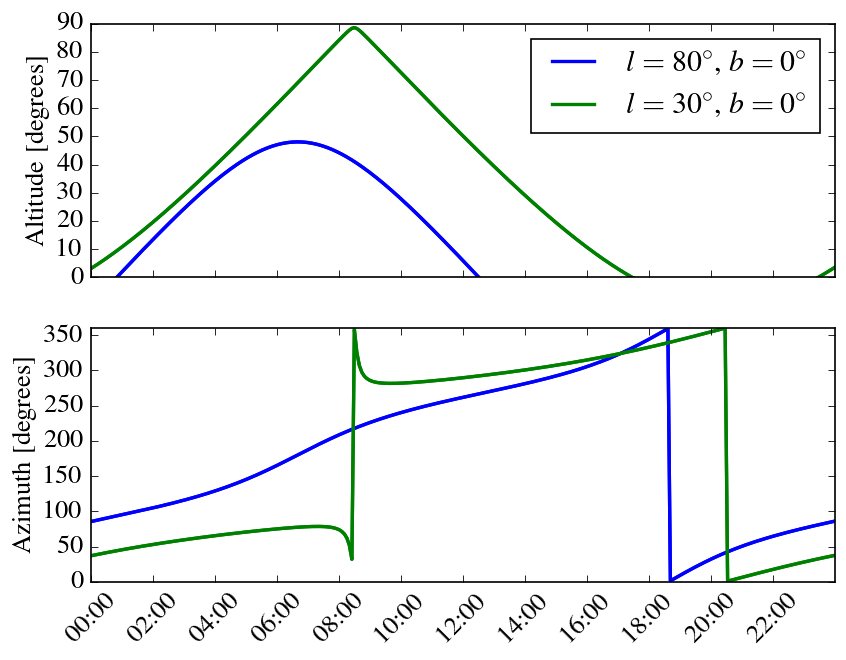

In [5]:
fig, (altax, azax) = plt.subplots(2, 1, figsize=(8, 6), sharex=True)

coord_dict = {
    r'$l=30^{\circ}$, $b=0^{\circ}$': altazcoords1,
    r'$l=80^{\circ}$, $b=0^{\circ}$': altazcoords2
}

colors = ['blue', 'green']

for (lab, coord), color in zip(coord_dict.items(), colors):
    altax.plot(timesteps, coord.alt, lw=2, color=color)
    altax.plot(timesteps, coord.alt, lw=2, color=color, label=lab)
    
    azax.plot(timesteps, coord.az, lw=2, color=color)
    azax.plot(timesteps, coord.az, lw=2, color=color, label='')

altax.set_ylim(0, 90)
azax.set_ylim(0, 360)
azax.set_xlim(0, length.to('hour').value)
plt.setp(altax.get_yticklabels(), fontsize=16)
plt.setp(azax.get_yticklabels(), fontsize=16)

azax.set_ylabel('Azimuth [degrees]', fontsize=16)
altax.set_ylabel('Altitude [degrees]', fontsize=16)

ticklabel_step = 2*units.hour
ticklabel_timesteps = np.arange(0, length.to('hour').value, ticklabel_step.to('hour').value)*units.hour
ticklabel_times = starttime + ticklabel_timesteps

azax.set_xticks(ticklabel_timesteps.value)
labs = azax.set_xticklabels(['{0:02d}:{1:02d}'.format(t.datetime.hour, t.datetime.minute) for t in ticklabel_times], fontsize=16)
plt.setp(labs, rotation=45)

altax.legend(loc='upper right', fontsize=18)

fig.savefig('srt_obs.pdf', bbox_inches='tight')